In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [3]:
out=pt.import_excel(r'../ArcPL_Dec2022.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=~newMask
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, P=cpx_Glass['P_kbar_x'], T=cpx_Glass['T_K_x'])

sigma=1.5
Eq_Mask=((eq_tests['Delta_EnFs_Mollo13']<0.05)
        &(eq_tests['Delta_Kd_Put2008']<0.08) 
        &(eq_tests['Cation_Sum_Cpx'].between(3.95, 4.05))
         &(cpx_Glass['N_meas_Cpx']>=5)
         & (cpx_Glass['H2O_Liq']>0)
        
        )

xT=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask]
x=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]
x_All=cpx_Glass['P_kbar_x'].loc[Press_new]
xT_All=cpx_Glass['T_K_x'].loc[Press_new]

## Masked Cpxs and Glasses
x_T_Mask=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)
x_P_kbar_Mask=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)

Cpx_Mask=myCpxs1.loc[Press_new&Eq_Mask].reset_index(drop=True)
Liq_Mask=myLiquids1.loc[Press_new&Eq_Mask].reset_index(drop=True)
cpx_Glass_Mask=cpx_Glass.loc[Press_new&Eq_Mask].reset_index(drop=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\AppData\Local\Temp\ipykernel_20704\2281926665.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [4]:
## Ones in Wang
InWang=(cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005_notinLEPR')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR'))
                                               
cpx_Glass_Mask_Wang=cpx_Glass_Mask.loc[~InWang].reset_index(drop=True)
Cpx_Mask_Wang=Cpx_Mask.loc[~InWang].reset_index(drop=True)
Liq_Mask_Wang=Liq_Mask.loc[~InWang].reset_index(drop=True)
x_T_Mask_Wang=x_T_Mask.loc[~InWang].reset_index(drop=True)
x_P_kbar_Mask_Wang=x_P_kbar_Mask.loc[~InWang].reset_index(drop=True)                                               

In [5]:
# Ones in Jorg
InJorg=(cpx_Glass_Mask['Citation_x'].str.contains('Kraw2013')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005')   
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Feig2010')   
        
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Nandekar2014_notinLEPR')   

    |
     cpx_Glass_Mask['Citation_x'].str.contains('Melekhova2015_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Ulmer2018')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Almeev2013')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Parat2014_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR')      

       
       )

cpx_Glass_Mask_Jorg=cpx_Glass_Mask.loc[~InJorg].reset_index(drop=True)
Cpx_Mask_Jorg=Cpx_Mask.loc[~InJorg].reset_index(drop=True)
Liq_Mask_Jorg=Liq_Mask.loc[~InJorg].reset_index(drop=True)
x_T_Mask_Jorg=x_T_Mask.loc[~InJorg].reset_index(drop=True)
x_P_kbar_Mask_Jorg=x_P_kbar_Mask.loc[~InJorg].reset_index(drop=True)

In [6]:
CalcJorg=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_Mask_Jorg, 
                                         equationP="P_Jorgenson2022_Cpx_only",
                                         equationT="T_Jorgenson2022_Cpx_only")

CalcPetJorg=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_Mask_Jorg, 
                                         equationP="P_Petrelli2020_Cpx_only",
                                         equationT="T_Petrelli2020_Cpx_only")

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_

Youve selected a T-independent function
Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at you

Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Calculating P and T

In [8]:
CalcWang=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_Mask_Wang, 
                                         equationP="P_Wang2021_eq1",
                                         equationT="T_Wang2021_eq2",
                                          H2O_Liq=cpx_Glass_Mask_Wang['H2O_Liq'])

Youve selected a P-independent function
Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [9]:
CalcPet=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_Mask_Jorg, 
                                         equationP="P_Petrelli2020_Cpx_only",
                                         equationT="T_Petrelli2020_Cpx_only")

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  w

Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  

Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_Mask, H2O_Liq=Liq_Mask['H2O_Liq'])
Calc.head()

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,P_Put_Teq32d_Peq32a,P_Put_Teq32d_Peq32b,"Jd_from 0=Na, 1=Al",SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,H2O_Liq,T_Put_Teq32d_subsol_Peq32a,T_Put_Teq32d_subsol_Peq32b,P_Put_Teq32d_subsol_Peq32a,P_Put_Teq32d_subsol_Peq32b
0,3.879945,1385.375865,1391.214677,5.517883,1391.087778,1431.243333,6.317842,1489.355091,1481.956321,6.193236,7.671225,6.782934,0,50.3,0.42,5.19,8.88,0.08,16.0,18.9,0.24,0.0,0.0,383,1.860249,0.882128,0.274645,0.748924,0.226218,0.017209,0.0,0.002506,0.011684,0.0,0.0,0.139751,0.086467,0.462890,0.144118,0.392992,4.023563,0.392992,0.047126,0.227519,0.171590,0.0,0.205402,0.762570,0.017209,0.069258,0.035247,0.644420,0.256177,0.644420,0.490357,0.047126,0.227519,2.7,1326.623353,1299.618890,5.118112,2.503831
1,5.541037,1426.844737,1412.363930,5.675299,1408.572222,1441.794444,6.132733,1508.092579,1502.838234,6.001818,8.902529,8.275244,0,52.0,0.34,4.40,8.87,0.23,16.4,17.5,0.22,0.0,0.0,384,1.910419,0.898209,0.272524,0.688869,0.190517,0.015671,0.0,0.007157,0.009396,0.0,0.0,0.089581,0.100936,0.483012,0.146550,0.370439,3.992762,0.370439,0.000000,0.272524,0.000000,0.0,0.265000,0.767213,0.015671,0.085265,0.002158,0.601445,0.284644,0.601445,0.458637,-0.014476,0.287000,1.6,1383.426165,1369.124125,5.724966,4.390973
2,5.064412,1419.767386,1415.543035,5.920577,1417.621111,1461.234444,6.868020,1505.599240,1490.265085,6.596742,8.916141,7.082317,0,50.8,0.35,4.84,9.12,0.20,17.0,17.4,0.27,0.0,0.0,385,1.873072,0.934433,0.281217,0.687406,0.210326,0.019302,0.0,0.006246,0.009707,0.0,0.0,0.126928,0.083398,0.491017,0.147771,0.361212,4.021709,0.361212,0.043418,0.237799,0.154393,0.0,0.259618,0.768664,0.019302,0.064096,0.031416,0.591894,0.311878,0.591894,0.452645,0.043418,0.237799,1.6,1378.650814,1352.127078,5.796305,3.312416
3,5.985132,1417.331953,1429.150000,7.751886,1427.712222,1459.271111,8.086807,1510.563708,1495.803599,7.651953,10.029586,8.259334,0,50.2,0.44,5.88,9.60,0.20,16.4,16.9,0.30,0.0,0.0,390,1.853520,0.902705,0.296429,0.668580,0.255875,0.021476,0.0,0.006255,0.012220,0.0,0.0,0.146480,0.109395,0.483321,0.158712,0.357967,4.017061,0.357967,0.034121,0.262308,0.115107,0.0,0.266962,0.752791,0.021476,0.087919,0.029281,0.551381,0.323877,0.551381,0.412924,0.034121,0.262308,1.6,1390.508694,1366.455851,6.825725,4.574632
4,5.909166,1397.189422,1407.941045,7.051373,1416.487778,1456.861111,7.849873,1502.433257,1483.633691,7.779584,10.230144,7.960709,0,49.0,0.47,6.89,10.50,0.21,15.4,17.3,0.34,0.0,0.0,391,1.818519,0.852022,0.325887,0.687925,0.301369,0.024465,0.0,0.006601,0.013120,0.0,0.0,0.181481,0.119888,0.456644,0.174660,0.368696,4.029909,0.368696,0.059818,0.266069,0.183553,0.0,0.240753,0.723328,0.024465,0.095422,0.043029,0.549473,0.314218,0.549473,0.395238,0.059818,0.266069,1.6,1368.857376,1337.288028,7.167781,4.158601


In [11]:
Temp_Stats_32d_32a=pt.calculate_R2_Tukey(x_T_Mask, 
                                         Calc['T_Put_Teq32d_Peq32a']) 
Press_Stats_32d_32a=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                         Calc['P_Put_Teq32d_Peq32a']) 
Temp_Stats_32d_subsol_32a=pt.calculate_R2_Tukey(x_T_Mask, 
                                         Calc['T_Put_Teq32d_subsol_Peq32a']) 
Press_Stats_32d_subsol_32a=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                         Calc['P_Put_Teq32d_subsol_Peq32a']) 

Temp_Stats_32d_32b=pt.calculate_R2_Tukey(x_T_Mask, 
                                         Calc['T_Put_Teq32d_Peq32b']) 
Press_Stats_32d_32b=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                         Calc['P_Put_Teq32d_Peq32b']) 
Temp_Stats_32d_subsol_32b=pt.calculate_R2_Tukey(x_T_Mask, 
                                         Calc['T_Put_Teq32d_subsol_Peq32b']) 
Press_Stats_32d_subsol_32b=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                         Calc['P_Put_Teq32d_subsol_Peq32b']) 

Temp_Stats_Wang=pt.calculate_R2_Tukey(x_T_Mask_Wang, 
                                         CalcWang.T_K_calc) 
Press_Stats_Wang=pt.calculate_R2_Tukey(x_P_kbar_Mask_Wang, 
                                         CalcWang.P_kbar_calc) 

Temp_Stats_Jorg=pt.calculate_R2_Tukey(x_T_Mask_Jorg, 
                                        CalcJorg.T_K_calc) 
Press_Stats_Jorg=pt.calculate_R2_Tukey(x_P_kbar_Mask_Jorg, 
                                         CalcJorg.P_kbar_calc) 
Press_Stats_Petrelli=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                         Calc['P_Petrelli20']) 
Press_Stats_Petrelli2=pt.calculate_R2_Tukey(x_P_kbar_Mask_Jorg, 
                                         CalcPet.P_kbar_calc) 



## Text figure - Pressure

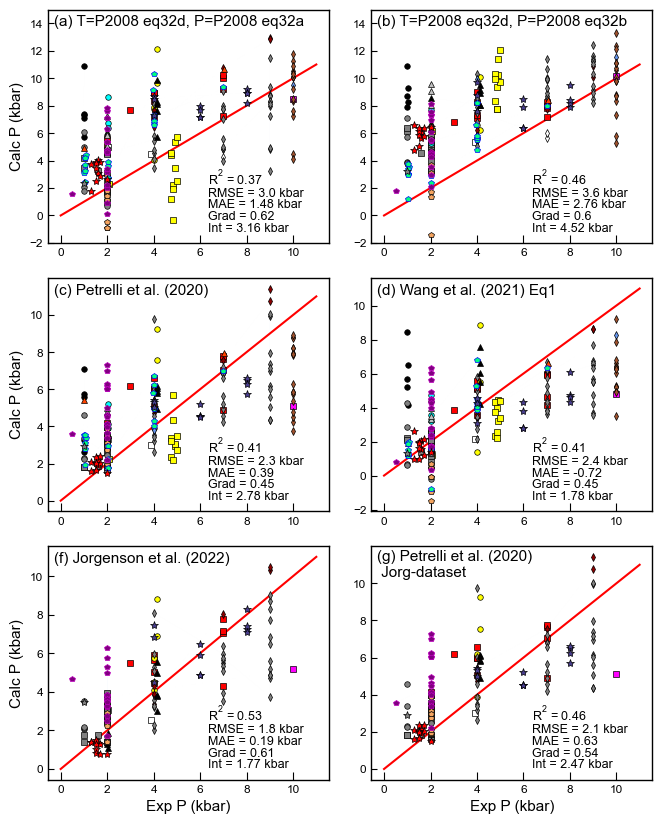

In [13]:
fig, ((ax0, ax1), (ax4, ax3), (ax2, ax5)) = plt.subplots(3,2, figsize = (7.8,10)) # adjust dimensions of figure here
lin_min=0
lin_max=11

face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'yellow', 'orange')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '*', '*')


nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6)

ax0.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax3.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax4.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax5.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  
    
## 32-32a
    ax0.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_Put_Teq32d_Peq32a'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

## 32-32b
    
    ax1.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_Put_Teq32d_Peq32b'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

 # Jorgenson  
    ax2.plot(x_P_kbar_Mask_Jorg.loc[cpx_Glass_Mask_Jorg['Citation_x']==ref],
             CalcJorg['P_kbar_calc'].loc[cpx_Glass_Mask_Jorg['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    # Wang
    ax3.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_Wang21_eq1'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    
        
        
        #Petrelli
    ax4.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_Petrelli20'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    ax5.plot(x_P_kbar_Mask_Jorg.loc[cpx_Glass_Mask_Jorg['Citation_x']==ref],
             CalcPet['P_kbar_calc'].loc[cpx_Glass_Mask_Jorg['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

        
        
        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33
ax0.annotate("(a) T=P2008 eq32d, P=P2008 eq32a", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax1.annotate("(b) T=P2008 eq32d, P=P2008 eq32b", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax2.annotate("(f) Jorgenson et al. (2022)", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax3.annotate("(d) Wang et al. (2021) Eq1", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)
ax4.annotate("(c) Petrelli et al. (2020)", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)
ax5.annotate("(g) Petrelli et al. (2020) \n Jorg-dataset", xy=(0.02, 0.87),
             xycoords="axes fraction",  fontsize=11)

# Statistics - #############################################3

Press_Stats_PN17_Teq33=Press_Stats_32d_32a
ax0.annotate("R$^{2}$ = "+str(Press_Stats_PN17_Teq33['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax0.annotate("RMSE = "+str(Press_Stats_PN17_Teq33['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax0.annotate("MAE = "+str(Press_Stats_PN17_Teq33['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax0.annotate("Grad = "+str(Press_Stats_PN17_Teq33['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)
ax0.annotate("Int = "+str(Press_Stats_PN17_Teq33['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=9)

Press_Stats_30_Teq33=Press_Stats_32d_32b
ax1.annotate("R$^{2}$ = "+str(Press_Stats_30_Teq33['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE = "+str(Press_Stats_30_Teq33['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("MAE = "+str(Press_Stats_30_Teq33['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Grad = "+str(Press_Stats_30_Teq33['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Int = "+str(Press_Stats_30_Teq33['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=9)




Press_Stats_Jorg=Press_Stats_Jorg
ax2.annotate("R$^{2}$ = "+str(Press_Stats_Jorg['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE = "+str(Press_Stats_Jorg['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("MAE = "+str(Press_Stats_Jorg['Mean Error']) +" kbar",
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Grad = "+str(Press_Stats_Jorg['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Int = "+str(Press_Stats_Jorg['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=9)


Press_Stats_32c_Teq33=Press_Stats_Wang
ax3.annotate("R$^{2}$ = "+str(Press_Stats_32c_Teq33['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE = "+str(Press_Stats_32c_Teq33['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax3.annotate("MAE = "+str(Press_Stats_32c_Teq33['Mean Error']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)

ax3.annotate("Grad = "+str(Press_Stats_32c_Teq33['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)
ax3.annotate("Int = "+str(Press_Stats_32c_Teq33['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=9)

stats4=Press_Stats_Petrelli
ax4.annotate("R$^{2}$ = "+str(stats4['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax4.annotate("RMSE = "+str(stats4['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax4.annotate("MAE = "+str(stats4['Mean Error']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)

ax4.annotate("Grad = "+str(stats4['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)
ax4.annotate("Int = "+str(stats4['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=9)

stats5=Press_Stats_Petrelli2
ax5.annotate("R$^{2}$ = "+str(stats5['R$^{2}$']),
                           xy=(0.57, 0.25), xycoords="axes fraction", fontsize=9)
ax5.annotate("RMSE = "+str(stats5['RMSE_num']) +" kbar",
                           xy=(0.57, 0.2), xycoords="axes fraction", fontsize=9)
ax5.annotate("MAE = "+str(stats5['Mean Error']),
                           xy=(0.57, 0.15), xycoords="axes fraction", fontsize=9)

ax5.annotate("Grad = "+str(stats5['Grad']),
                           xy=(0.57, 0.1), xycoords="axes fraction", fontsize=9)
ax5.annotate("Int = "+str(stats5['Int']) +" kbar",
                           xy=(0.57, 0.05), xycoords="axes fraction", fontsize=9)




plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
ax0.set_ylabel('Calc P (kbar)')
ax4.set_ylabel('Calc P (kbar)')
ax2.set_ylabel('Calc P (kbar)')
ax2.set_xlabel('Exp P (kbar)')
ax5.set_xlabel('Exp P (kbar)')
ax0.set_ylim([-2, 15])
ax1.set_ylim([-2, 15])
# ax1.set_ylim([850, 1350])
fig.savefig('Cpx_only_Press_Comparison_lABELLED.png', dpi=300)